# Part 1: Data preprocessing


1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel("Data_Sheet.xlsx",header=0)

In [ ]:
dataset.head()

,Grain,Phi1 (°),Psi (°),Phi2 (°),h (nm),P (mN),x (µm),d (nm)
0,10,105.81,94.4,192.38,0.000000,0.000000,-2.390996,64.32688
1,10,105.81,94.4,192.38,1.817280,4.001145,-2.381237,64.46653
2,10,105.81,94.4,192.38,2.879298,9.905321,-2.371478,64.85121
3,10,105.81,94.4,192.38,4.122832,16.590043,-2.361719,65.14177
4,10,105.81,94.4,192.38,5.172039,22.889292,-2.351960,65.31030


In [ ]:
dataset.shape

(2977, 8)

## Exploratory Data Analysis

In [ ]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977 entries, 0 to 2976
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Grain     2977 non-null   int64  
 1   Phi1 (°)  2977 non-null   float64
 2   Psi (°)   2977 non-null   float64
 3   Phi2 (°)  2977 non-null   float64
 4   h (nm)    2977 non-null   float64
 5   P (mN)    2977 non-null   float64
 6   x (µm)    2338 non-null   float64
 7   d (nm)    2338 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 186.2 KB


In [ ]:
# statistical summary
dataset.describe()

,Grain,Phi1 (°),Psi (°),Phi2 (°),h (nm),P (mN),x (µm),d (nm)
count,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2338.000000,2338.000000
mean,81.020826,53.489678,109.748697,211.630568,312.167081,904.760728,0.026809,-24.811868
std,83.750535,66.283225,24.997320,20.148508,260.235189,1056.664241,2.239194,147.344699
min,10.000000,0.040000,72.580000,184.560000,0.000000,-1.955496,-6.856725,-907.625241
25%,11.000000,0.040000,94.400000,192.380000,168.104039,305.819252,-1.233541,-44.955699
50%,16.000000,3.890000,107.010000,214.740000,262.727229,600.426992,-0.056589,19.289107
75%,181.000000,105.810000,137.100000,233.020000,269.430656,893.932969,1.123685,53.349778
max,185.000000,158.750000,137.100000,233.020000,968.271687,4964.699145,7.823699,225.821300


## Dealing with the missing data

In [ ]:
# check if there are any null values
dataset.isnull().values.any()

True

In [ ]:
# check how many null values
dataset.isnull().sum()

Grain         0
Phi1 (°)      0
Psi (°)       0
Phi2 (°)      0
h (nm)        0
P (mN)        0
x (µm)      639
d (nm)      639
dtype: int64

In [ ]:
# drop columns that have missing values
dataset=dataset.dropna()
#Replace missing values with Mean
#dataset["x (µm)"].fillna(dataset["d (nm)"].mean())
#dataset["d (nm)"].fillna(dataset["d (nm)"].mean())

In [ ]:
# check how many null values
dataset.isnull().sum()

Grain       0
Phi1 (°)    0
Psi (°)     0
Phi2 (°)    0
h (nm)      0
P (mN)      0
x (µm)      0
d (nm)      0
dtype: int64

## Data visualisation 


<AxesSubplot:>

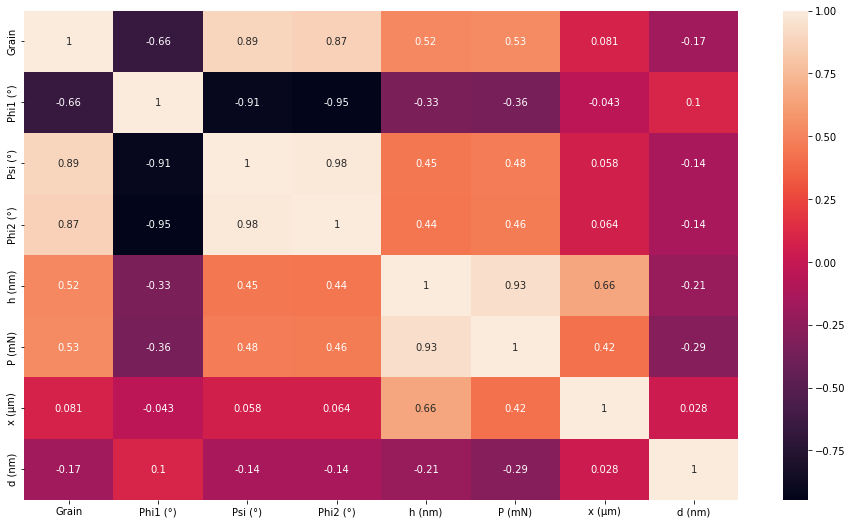

In [ ]:
# Create Correlation Matrix
corr = dataset.corr()
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [ ]:
#sns.pairplot(dataset, kind="reg")

## SVR and RFR without using learning curves and cross-validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score



# Split the data set into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(dataset.drop("Grain", axis=1), dataset["Grain"], test_size=0.25, random_state=666)

# Split the training set into validation and training sets
val_data, train_data, val_target, train_target = train_test_split(train_data, train_target, test_size=0.2, random_state=666)

# Train the SVR model
svr = SVR(kernel='linear', C=1, epsilon=0.1)
svr.fit(train_data, train_target)

# Make predictions using the SVR model
svr_predictions = svr.predict(val_data)

# Calculate the R2 score for the SVR model
svr_r2_score = r2_score(val_target, svr_predictions)
print("SVR R2 score:", svr_r2_score)

# Train the Random Forest Regression model
rfr = RandomForestRegressor(n_estimators=100, random_state=666)
rfr.fit(train_data, train_target)

# Make predictions using the Random Forest Regression model
rfr_predictions = rfr.predict(val_data)

# Calculate the R2 score for the Random Forest Regression model
rfr_r2_score = r2_score(val_target, rfr_predictions)
print("Random Forest Regression R2 score:", rfr_r2_score)

SVR R2 score: 0.999987602768554
Random Forest Regression R2 score: 1.0


## training RFR model using learning curves and cross-validation

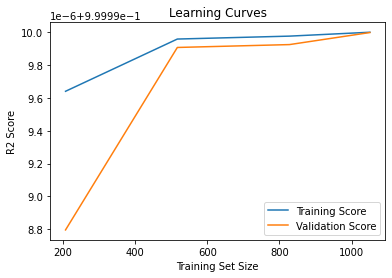

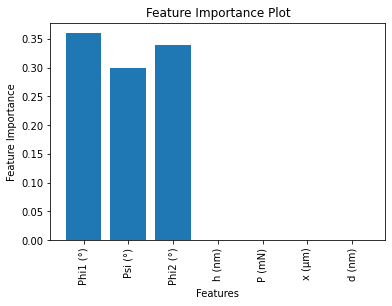

Test R2 Score: 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt



# Randomize the data and set a constant random state for reproducibility
np.random.seed(666)
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing sets
X = dataset.drop("Grain", axis=1)
y = dataset["Grain"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Train the Random Forest Regressor with default parameters
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Plot learning curves to assess the sufficiency of the number of data points
train_sizes, train_scores, val_scores = learning_curve(
    rfr, X_train, y_train, train_sizes=np.array([ 207, 517, 828, 1051]), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curves")
plt.show()

# Calculate feature importance
importances = rfr.feature_importances_

# Plot the feature importances in a bar plot
features = X.columns
plt.bar(features, importances)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.xticks(rotation=90)
plt.show()

# Use the final model to predict on the test set and evaluate the accuracy
y_pred = rfr.predict(X_test)
r2_score = rfr.score(X_test, y_test)
print("Test R2 Score:", r2_score)


## training SVR model using learning curves and cross-validation

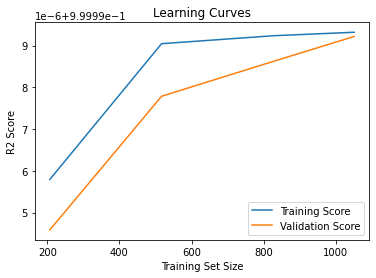

Test R2 Score: 0.9999993164685326


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data into a pandas dataframe
#df = pd.read_csv("Data Sheet 1.CSV")

# Randomize the data and set a constant random state for reproducibility
np.random.seed(666)
df = dataset.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing sets
X = df.drop("Grain", axis=1)
y = df["Grain"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Define the parameters for GridSearchCV
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

# Train the SVR using GridSearchCV
svr = GridSearchCV(SVR(), param_grid, cv=5)

svr.fit(X_train, y_train)


# Plot learning curves to assess the sufficiency of the number of data points
train_sizes, train_scores, val_scores = learning_curve(
    svr, X_train, y_train, train_sizes=np.array([207, 517, 828, 1051]), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curves")
plt.show()

# Use the final model to predict on the test set and evaluate the accuracy
y_pred = svr.predict(X_test)
r2_score = svr.score(X_test, y_test)
print("Test R2 Score:", r2_score)


## Test with new values

In [ ]:
# test new values that normally designate grain #10
X_new=[[105.81,	94.4,	192.56,	3.831,	4.0079454,	-2.3909964,	63.2733]]
y_new = rfr.predict(X_new)
print("grain : ",y_new)


grain :  [10.]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
